## Лабораторная работа №2
Рассчитать значения температуры для глубин $(5, 10, 20, 25, 30, 40)$ с помощью линейной и квадратичной интерполяции.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file_path = "data/data.txt"
with open(data_file_path, "r") as f:
    df = pd.read_csv(f, sep=";")

df.head(n=10)

,Date,Time,"Depth,m","Conducnivity,S/m","Temperature,C","Salinity,PSU","SigmaT,kg/m3",O2%,O2mg/l,pH,Cruise,Type,"Bot,Depth",Longitude,Latitude,Station
0,07/17/2014,01:00:00,0.4131,10.45756,18.73308,6.8119,3.6502,108.447,9.690,10.2504,Komplex_July_2014,C,50,19.9298,55.0487,15
1,07/17/2014,01:00:00,0.4238,10.45751,18.73308,6.8119,3.6502,108.452,9.690,10.2504,Komplex_July_2014,C,50,19.9298,55.0487,15
2,07/17/2014,01:00:00,0.4466,10.45645,18.73316,6.8111,3.6497,108.473,9.692,10.2505,Komplex_July_2014,C,50,19.9298,55.0487,15
3,07/17/2014,01:00:00,0.4733,10.45651,18.73316,6.8112,3.6499,108.491,9.693,10.2506,Komplex_July_2014,C,50,19.9298,55.0487,15
4,07/17/2014,01:00:00,0.4991,10.45657,18.73343,6.8112,3.6500,108.508,9.695,10.2505,Komplex_July_2014,C,50,19.9298,55.0487,15
5,07/17/2014,01:00:00,0.5421,10.45593,18.73306,6.8108,3.6499,108.536,9.698,10.2505,Komplex_July_2014,C,50,19.9298,55.0487,15
6,07/17/2014,01:00:00,0.5834,10.45602,18.73293,6.8108,3.6502,108.562,9.700,10.2504,Komplex_July_2014,C,50,19.9298,55.0487,15
7,07/17/2014,01:00:00,0.6313,10.45606,18.73240,6.8110,3.6506,108.575,9.701,10.2505,Komplex_July_2014,C,50,19.9298,55.0487,15
8,07/17/2014,01:00:00,0.6849,10.45531,18.73185,6.8105,3.6506,108.606,9.704,10.2506,Komplex_July_2014,C,50,19.9298,55.0487,15
9,07/17/2014,01:00:00,0.7481,10.45548,18.73085,6.8108,3.6513,108.623,9.706,10.2507,Komplex_July_2014,C,50,19.9298,55.0487,15


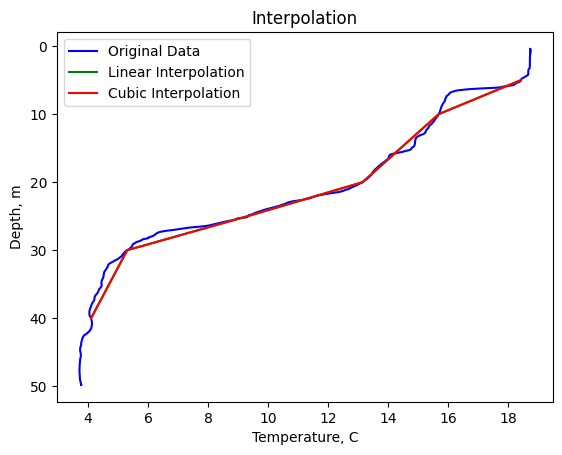

In [12]:
horizons = [5, 10, 20, 25, 30, 40]
temperatures_linear_interp = []
temperatures_cubic_interp = []

depth_column = "Depth,m"
temperature_column = "Temperature,C"

for horizon in horizons:
    for i in range(len(df) - 2):
        current_depth = df.loc[i, depth_column]
        next_depth = df.loc[i + 1, depth_column]
        next2_depth = df.loc[i + 2, depth_column]

        if current_depth <= horizon < next_depth:
            x1, y1 = df.loc[i, [depth_column, temperature_column]]
            x2, y2 = df.loc[i + 1, [depth_column, temperature_column]]
            x3, y3 = df.loc[i + 2, [depth_column, temperature_column]]

            temperatures_linear_interp.append(np.interp(horizon, [x1, x2], [y1, y2]))
            temperatures_cubic_interp.append(np.interp(horizon, [x1, x2, x3], [y1, y2, y3]))

fig, ax = plt.subplots(1, 1)

ax.plot(df[temperature_column], df[depth_column], "b", label="Original Data")
ax.plot(temperatures_linear_interp, horizons, "g", label="Linear Interpolation")
ax.plot(temperatures_cubic_interp, horizons, "r", label="Cubic Interpolation")

ax.set_title("Interpolation")
ax.invert_yaxis()
ax.legend()

plt.xlabel("Temperature, C")
plt.ylabel("Depth, m")
plt.show()